In [39]:
# LIBRARIES & MODULES IMPORT CELL --> Always import items in the top-part of your script
#  Required Libraries for Geospatial Data Merging
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely import Point, wkt, Polygon
print("Success")

Success


In [5]:
# Import Wildfire Data --> using CSV file with Pandas:
wildfire_csv = pd.read_csv("Operational_Data_Archive_2023.csv")
wildfire_csv.head(5)

,X,Y,OBJECTID,SourceGlobalID,SourceOID,GDB_FROM_DATE,GDB_TO_DATE,IncidentName,FeatureCategory,Label,...,FeatureAccess,FeatureStatus,IsVisible,PointName,CreateDate,DateCurrent,PointDateTime,IRWINID,GISS_Misc,GISS_Misc2
0,-123.073861,44.082071,1,{550B2411-21C2-430A-990C-BFD5C1DF8630},6,2022/12/20 17:04:12+00,2022/12/20 17:11:26+00,NaN,Aerial Hazard,NaN,...,Cooperators,Proposed,Yes,NaN,2022/12/20 17:04:12+00,2022/12/20 17:04:12+00,NaN,NaN,NaN,NaN
1,-123.074293,44.072512,3,{550B2411-21C2-430A-990C-BFD5C1DF8630},6,2022/12/20 17:11:26+00,2022/12/20 17:42:09+00,NaN,Aerial Hazard,NaN,...,Cooperators,Proposed,Yes,NaN,2022/12/20 17:04:12+00,2022/12/20 17:11:26+00,NaN,NaN,NaN,NaN
2,-123.077016,44.083323,4,{DBA7793D-D151-4401-A793-8FE0EFD8D56A},7,2023/01/03 18:28:13+00,2023/07/24 17:05:09+00,NaN,Hazard,NaN,...,Cooperators,Proposed,Yes,NaN,2023/01/03 18:28:13+00,2023/01/03 18:28:13+00,NaN,NaN,NaN,NaN
3,-81.913125,29.292720,7,{C6A2265A-1EB6-45BD-BABF-D2E72894D256},10,2023/01/15 22:36:52+00,2023/01/16 01:17:41+00,NaN,Safety Zone,NaN,...,Cooperators,Proposed,Yes,NaN,2023/01/15 22:36:52+00,2023/01/15 22:36:52+00,NaN,NaN,NaN,NaN
4,-81.913125,29.292720,9,{C6A2265A-1EB6-45BD-BABF-D2E72894D256},10,2023/01/16 01:17:41+00,2023/02/14 13:49:36+00,NaN,Staging Area,NaN,...,Cooperators,Proposed,Yes,NaN,2023/01/15 22:36:52+00,2023/01/16 01:17:41+00,NaN,NaN,NaN,NaN


For Loop is Successful!
82825
POINT (-77.152883588 34.993818063)


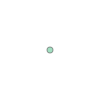

In [11]:
# Make our CSV File into a Geospatial File --> Points (Longitude, Latitude)
point1 = Point((wildfire_csv["X"][0], wildfire_csv["Y"][0]))
point2 = Point((wildfire_csv["X"][1], wildfire_csv["Y"][1]))

# Automate the PROCESS!
points = []  # Declare my empty list
for i in range(0, len(wildfire_csv)) :
    points.append(Point((wildfire_csv["X"][i], wildfire_csv["Y"][i])))

print("For Loop is Successful!")
print(len(points))
print(points[1000])
points[1000]

In [19]:
wildfire_df = wildfire_csv.copy()

# Add a column called "geometry" to the CSV DataFrame --> contains list of Point Objects:
wildfire_df["geometry"] = points

# Convert from a regular DataFrame to a GeoDataFrame using a "geometry" column:
wildfire_df = gpd.GeoDataFrame(wildfire_df, crs="EPSG:4326")
wildfire_df.head(5)

,X,Y,OBJECTID,SourceGlobalID,SourceOID,GDB_FROM_DATE,GDB_TO_DATE,IncidentName,FeatureCategory,Label,...,FeatureStatus,IsVisible,PointName,CreateDate,DateCurrent,PointDateTime,IRWINID,GISS_Misc,GISS_Misc2,geometry
0,-123.073861,44.082071,1,{550B2411-21C2-430A-990C-BFD5C1DF8630},6,2022/12/20 17:04:12+00,2022/12/20 17:11:26+00,NaN,Aerial Hazard,NaN,...,Proposed,Yes,NaN,2022/12/20 17:04:12+00,2022/12/20 17:04:12+00,NaN,NaN,NaN,NaN,POINT (-123.07386 44.08207)
1,-123.074293,44.072512,3,{550B2411-21C2-430A-990C-BFD5C1DF8630},6,2022/12/20 17:11:26+00,2022/12/20 17:42:09+00,NaN,Aerial Hazard,NaN,...,Proposed,Yes,NaN,2022/12/20 17:04:12+00,2022/12/20 17:11:26+00,NaN,NaN,NaN,NaN,POINT (-123.07429 44.07251)
2,-123.077016,44.083323,4,{DBA7793D-D151-4401-A793-8FE0EFD8D56A},7,2023/01/03 18:28:13+00,2023/07/24 17:05:09+00,NaN,Hazard,NaN,...,Proposed,Yes,NaN,2023/01/03 18:28:13+00,2023/01/03 18:28:13+00,NaN,NaN,NaN,NaN,POINT (-123.07702 44.08332)
3,-81.913125,29.292720,7,{C6A2265A-1EB6-45BD-BABF-D2E72894D256},10,2023/01/15 22:36:52+00,2023/01/16 01:17:41+00,NaN,Safety Zone,NaN,...,Proposed,Yes,NaN,2023/01/15 22:36:52+00,2023/01/15 22:36:52+00,NaN,NaN,NaN,NaN,POINT (-81.91312 29.29272)
4,-81.913125,29.292720,9,{C6A2265A-1EB6-45BD-BABF-D2E72894D256},10,2023/01/16 01:17:41+00,2023/02/14 13:49:36+00,NaN,Staging Area,NaN,...,Proposed,Yes,NaN,2023/01/15 22:36:52+00,2023/01/16 01:17:41+00,NaN,NaN,NaN,NaN,POINT (-81.91312 29.29272)


In [30]:
# Import State Boundaries:
states_df = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
states_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


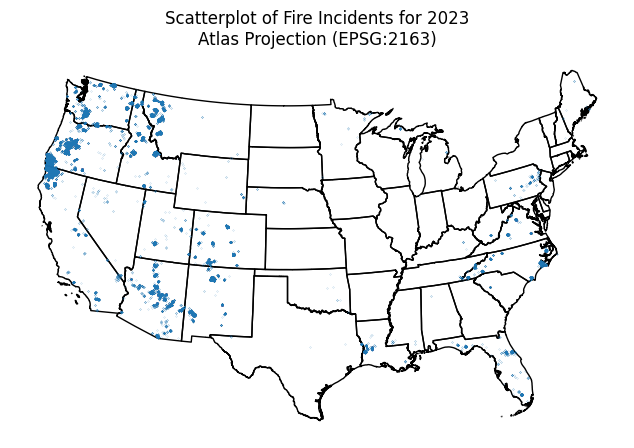

In [47]:
# Bounding Box for the contiguous United States:
bbox = Polygon([(-135, 24), (-135, 49.8), (-66.7, 49.8), (-66.7, 24)])

# Clip our GeoDataFrames & Give it a new Coordinate Reference System (CRS):
states_clipped = states_df.clip(bbox).to_crs("EPSG:2163")
wildfire_clipped = wildfire_df.clip(bbox).to_crs("EPSG:2163")

# Matplotlib figure --> use options to customize the size, appearance, and options of your plot:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
ax.axis("off")
ax.set_title("Scatterplot of Fire Incidents for 2023\nAtlas Projection (EPSG:2163)")
states_clipped.plot(ax=ax, facecolor="none")
wildfire_clipped.plot(ax=ax, markersize=0.01)
fig.savefig("wildfires_2023.png", dpi=500)

In [3]:
# Import Wildfire Data from the CSV File:
wildfire_csv = pd.read_csv("Operational_Data_Archive_2023.csv")
wildfire_csv

,X,Y,OBJECTID,SourceGlobalID,SourceOID,GDB_FROM_DATE,GDB_TO_DATE,IncidentName,FeatureCategory,Label,...,FeatureAccess,FeatureStatus,IsVisible,PointName,CreateDate,DateCurrent,PointDateTime,IRWINID,GISS_Misc,GISS_Misc2
0,-123.073861,44.082071,1,{550B2411-21C2-430A-990C-BFD5C1DF8630},6,2022/12/20 17:04:12+00,2022/12/20 17:11:26+00,NaN,Aerial Hazard,NaN,...,Cooperators,Proposed,Yes,NaN,2022/12/20 17:04:12+00,2022/12/20 17:04:12+00,NaN,NaN,NaN,NaN
1,-123.074293,44.072512,3,{550B2411-21C2-430A-990C-BFD5C1DF8630},6,2022/12/20 17:11:26+00,2022/12/20 17:42:09+00,NaN,Aerial Hazard,NaN,...,Cooperators,Proposed,Yes,NaN,2022/12/20 17:04:12+00,2022/12/20 17:11:26+00,NaN,NaN,NaN,NaN
2,-123.077016,44.083323,4,{DBA7793D-D151-4401-A793-8FE0EFD8D56A},7,2023/01/03 18:28:13+00,2023/07/24 17:05:09+00,NaN,Hazard,NaN,...,Cooperators,Proposed,Yes,NaN,2023/01/03 18:28:13+00,2023/01/03 18:28:13+00,NaN,NaN,NaN,NaN
3,-81.913125,29.292720,7,{C6A2265A-1EB6-45BD-BABF-D2E72894D256},10,2023/01/15 22:36:52+00,2023/01/16 01:17:41+00,NaN,Safety Zone,NaN,...,Cooperators,Proposed,Yes,NaN,2023/01/15 22:36:52+00,2023/01/15 22:36:52+00,NaN,NaN,NaN,NaN
4,-81.913125,29.292720,9,{C6A2265A-1EB6-45BD-BABF-D2E72894D256},10,2023/01/16 01:17:41+00,2023/02/14 13:49:36+00,NaN,Staging Area,NaN,...,Cooperators,Proposed,Yes,NaN,2023/01/15 22:36:52+00,2023/01/16 01:17:41+00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82820,-123.977704,41.850678,136128,{14ECFAD9-EF57-4918-B8FE-F32B40691778},24682,2023/12/22 22:33:50+00,NaN,Smith River Complex,Road Repair,NaN,...,Cooperators,Approved,Yes,NaN,2023/09/20 22:09:50+00,2023/12/22 22:33:50+00,NaN,{3BB45524-295D-4F64-8BCB-C0B6DCBC0376},South,1271
82821,-123.909954,41.685150,136131,{01FF4AEC-CFBB-48F1-AEC8-FCF87A822E9A},25063,2023/12/22 22:34:14+00,NaN,Smith River Complex,Staging Area,NaN,...,Cooperators,Approved,Yes,1,2023/09/22 23:08:38+00,2023/12/22 22:34:14+00,NaN,{3BB45524-295D-4F64-8BCB-C0B6DCBC0376},South,1111
82822,-123.928288,41.692129,136132,{EDD25C38-4CC5-44C9-AE9D-C6FC410E9649},25065,2023/12/22 22:34:17+00,NaN,Smith River Complex,Staging Area,NaN,...,Cooperators,Approved,Yes,6,2023/09/22 23:17:15+00,2023/12/22 22:34:17+00,NaN,{3BB45524-295D-4F64-8BCB-C0B6DCBC0376},South,1142
82823,-124.026824,41.793160,136133,{CFAF99D2-F52A-48E7-8EF3-1304CB2800BC},25067,2023/12/22 22:34:22+00,NaN,Smith River Complex,Staging Area,NaN,...,Cooperators,Approved,Yes,4,2023/09/22 23:44:43+00,2023/12/22 22:34:22+00,NaN,{3BB45524-295D-4F64-8BCB-C0B6DCBC0376},South,1413


In [2]:
# Import Wildfire Data from the GeoJSON file:
wildfire_df = gpd.read_file("Operational_Data_Archive_2023.geojson")
wildfire_df.head()

,OBJECTID,SourceGlobalID,SourceOID,GDB_FROM_DATE,GDB_TO_DATE,IncidentName,FeatureCategory,Label,MapMethod,Comments,...,FeatureStatus,IsVisible,PointName,CreateDate,DateCurrent,PointDateTime,IRWINID,GISS_Misc,GISS_Misc2,geometry
0,1,{550B2411-21C2-430A-990C-BFD5C1DF8630},6,2022-12-20 17:04:12+00:00,2022-12-20 17:11:26+00:00,None,Aerial Hazard,None,Mixed Methods,None,...,Proposed,Yes,None,2022-12-20 17:04:12+00:00,2022-12-20 17:04:12+00:00,NaT,None,None,None,POINT (-123.07386 44.08207)
1,3,{550B2411-21C2-430A-990C-BFD5C1DF8630},6,2022-12-20 17:11:26+00:00,2022-12-20 17:42:09+00:00,None,Aerial Hazard,None,Mixed Methods,None,...,Proposed,Yes,None,2022-12-20 17:04:12+00:00,2022-12-20 17:11:26+00:00,NaT,None,None,None,POINT (-123.07429 44.07251)
2,4,{DBA7793D-D151-4401-A793-8FE0EFD8D56A},7,2023-01-03 18:28:13+00:00,2023-07-24 17:05:09+00:00,None,Hazard,None,Mixed Methods,None,...,Proposed,Yes,None,2023-01-03 18:28:13+00:00,2023-01-03 18:28:13+00:00,NaT,None,None,None,POINT (-123.07702 44.08332)
3,7,{C6A2265A-1EB6-45BD-BABF-D2E72894D256},10,2023-01-15 22:36:52+00:00,2023-01-16 01:17:41+00:00,None,Safety Zone,None,Mixed Methods,None,...,Proposed,Yes,None,2023-01-15 22:36:52+00:00,2023-01-15 22:36:52+00:00,NaT,None,None,None,POINT (-81.91312 29.29272)
4,9,{C6A2265A-1EB6-45BD-BABF-D2E72894D256},10,2023-01-16 01:17:41+00:00,2023-02-14 13:49:36+00:00,None,Staging Area,None,Mixed Methods,None,...,Proposed,Yes,None,2023-01-15 22:36:52+00:00,2023-01-16 01:17:41+00:00,NaT,None,None,None,POINT (-81.91312 29.29272)
